![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [2]:
# Start your code here!
import pandas as pd

In [3]:
#Loading the dataset
men_results = pd.read_csv("men_results.csv")
women_results = pd.read_csv("women_results.csv")

In [4]:
men_results.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [5]:
women_results.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [6]:
men_results["date"] = pd.to_datetime(men_results["date"])
women_results["date"] = pd.to_datetime(women_results["date"])

In [7]:
men_results_filtered = men_results[(men_results["date"]>"2002-01-01")&(men_results["tournament"].isin(["FIFA World Cup"]))]
women_results_filtered = women_results[(women_results["date"]>"2002-01-01")&(women_results["tournament"].isin(["FIFA World Cup"]))]

In [8]:
men_results_filtered.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [9]:
women_results_filtered.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


In [10]:
#verifying the size of each group
#since there are two independent groups - we can use unpaired two sample test. 
print("the size of men's data:",len(men_results_filtered))
print("the size of women's data:",len(women_results_filtered))

the size of men's data: 384
the size of women's data: 200


In [11]:
#adding a column to get the total goals in a match
men_results_filtered["total_goals"] = men_results_filtered["home_score"]+ men_results_filtered["away_score"]
women_results_filtered["total_goals"] = women_results_filtered["home_score"]+ women_results_filtered["away_score"]

(array([49., 36., 57., 42.,  6.,  3.,  3.,  1.,  2.,  1.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

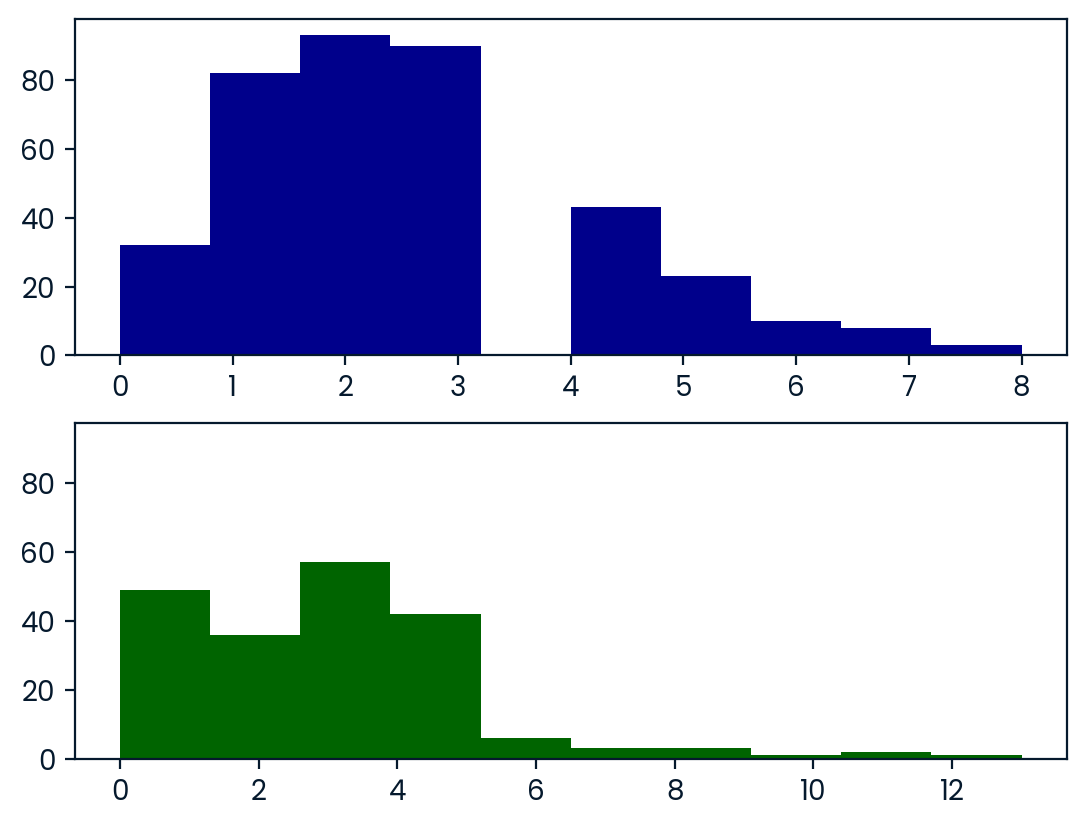

In [12]:
#finding the distribution using histogram
import matplotlib.pyplot as plt
fig , axs = plt.subplots(2,1, sharey= True)
axs[0].hist(men_results_filtered["total_goals"],color = "darkblue")
axs[1].hist(women_results_filtered["total_goals"],color = "darkgreen")

Based on the above we can clearly see that the data is not normally distributed.
Since the data is independent and unpaired we can use Wilcoxon-Mann-Whitney test in non-parametric test

In [13]:
men_results_filtered["group"] = "men"
women_results_filtered["group"] = "women"

In [14]:
#combining the two dataframes on date
combined_data = pd.concat([women_results_filtered,men_results_filtered], axis = 0, ignore_index= True)

In [15]:
combined_data.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goals,group
0,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3,women
1,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2,women
2,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5,women
3,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6,women
4,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4,women


In [16]:
total_goals = combined_data[["total_goals","group"]]
total_goals.head()

,total_goals,group
0,3,women
1,2,women
2,5,women
3,6,women
4,4,women


In [17]:
#making the data wide for using in the pingouin WMU test
total_goals_wide = total_goals.pivot(columns="group",values="total_goals")
total_goals_wide.head()

group,men,women
0,NaN,3.0
1,NaN,2.0
2,NaN,5.0
3,NaN,6.0
4,NaN,4.0


In [18]:
import pingouin
wmu_test = pingouin.mwu(x=total_goals_wide["women"],y=total_goals_wide["men"],alternative = "greater")
print(wmu_test)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


In [19]:
p_val = wmu_test["p-val"].values[0]
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"
result_dict = {"p_val": p_val, "result":result}

In [21]:
print(f'p_val:{result_dict["p_val"]} and result:{result_dict["result"]}')

p_val:0.005106609825443641 and result:reject


Since the significance level is 10% and the p-value is 0.005107, which is below the threshold, we reject the null hypothesis.